#### Dados de pedidos dos meses de maio junho e julho (ambiente app), foram categorizados por dia da semana e plotamos, em media, para observar seu volume respectivamente. O objetivo eh visualizar em quais dias temos maior volume de pedidos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [2]:
df = pd.read_csv('dados/Pedidos.csv', sep=';')

In [3]:
df['Data'] = pd.to_datetime(df['Data'])
df['day_of_week'] = df['Data'].dt.day_name()
df = df[['Data', 'day_of_week', 'SumQtdPedidos']]
df = df.sort_values(by=['Data'], ascending=True)

In [38]:
df.info()

In [13]:
avrg = df.groupby(['day_of_week'])['SumQtdPedidos'].mean().reset_index()

In [41]:
'''
desvio padrao:
df.groupby(['day_of_week'])['SumQtdPedidos'].std()

day_of_week
Friday       339.921462
Monday       371.909538
Saturday     336.988853
Sunday       380.391826
Thursday     332.555840
Tuesday      371.285156
Wednesday    346.973244
Name: SumQtdPedidos, dtype: float64
'''

day_of_week
Friday       339.921462
Monday       371.909538
Saturday     336.988853
Sunday       380.391826
Thursday     332.555840
Tuesday      371.285156
Wednesday    346.973244
Name: SumQtdPedidos, dtype: float64

In [29]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
avrg['day_of_week'] = pd.Categorical(avrg['day_of_week'], categories=cats, ordered=True)
avrg = avrg.sort_values(by=['day_of_week'])

In [29]:
avrg

,day_of_week,SumQtdPedidos
1,Monday,515.343615
5,Tuesday,502.310154
6,Wednesday,476.645462
4,Thursday,546.722769
0,Friday,569.092500
2,Saturday,573.090308
3,Sunday,534.356846


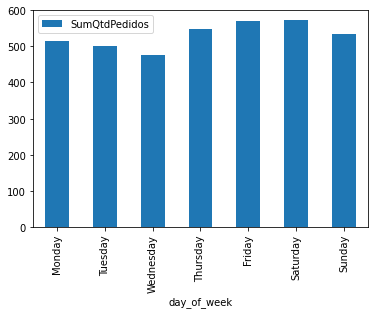

In [32]:
ax = avrg.plot.bar(x='day_of_week', y='SumQtdPedidos')
plt.show()

In [49]:
# mudanca percentual de um dia para outro
avrg['%change'] = round(avrg['SumQtdPedidos'].pct_change().fillna(0),2)

In [50]:
avrg

,day_of_week,SumQtdPedidos,%change
1,Monday,515.343615,0.00
5,Tuesday,502.310154,-0.03
6,Wednesday,476.645462,-0.05
4,Thursday,546.722769,0.15
0,Friday,569.092500,0.04
2,Saturday,573.090308,0.01
3,Sunday,534.356846,-0.07


#### mudanca no sinal da coluna '%change' indica mudanca no comportamento de compras. Por exemplo, ha tendencia de aumento no numero de pedidos de quarta para quinta feira ao passo que tendencia de queda de sabado para domingo.

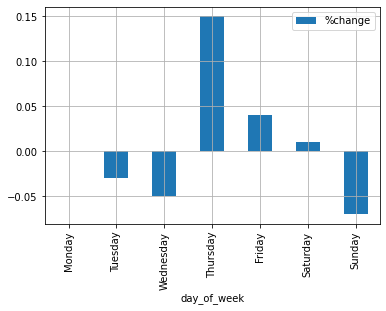

In [52]:
# obs: monday nao muda em relacao a si proprio, por isso esta nulo.
ax = avrg.plot.bar(x='day_of_week', y='%change')
plt.grid(True)
plt.show()